# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
 %pip install --upgrade plotly

Requirement already up-to-date: plotly in /Users/Cedoula/opt/anaconda3/lib/python3.8/site-packages (4.14.3)
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


In [5]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
# Shape and columns name
print(f'the shape of df_data is {df_data.shape}.')
df_data.columns

the shape of df_data is (962, 16).


Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
print(f'The Nobel prize was first awarded in {df_data.year.min()}.')
print(f'The latest year in the dataset is {df_data.year.max()}.')

The Nobel prize was first awarded in 1901.
The latest year in the dataset is 2020.


In [8]:
# df.info()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

**Challenge**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
# Duplicates
df_data.duplicated().sum()

0

There is no duplicate in the dataset.

### Check for NaN Values

In [10]:
# NaN
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [11]:
df_data[df_data.organization_name.isna()]

year    category                               prize  \
1    1901  Literature  The Nobel Prize in Literature 1901   
3    1901       Peace          The Nobel Peace Prize 1901   
4    1901       Peace          The Nobel Peace Prize 1901   
7    1902  Literature  The Nobel Prize in Literature 1902   
9    1902       Peace          The Nobel Peace Prize 1902   
..    ...         ...                                 ...   
932  2018       Peace          The Nobel Peace Prize 2018   
942  2019  Literature  The Nobel Prize in Literature 2019   
946  2019       Peace          The Nobel Peace Prize 2019   
954  2020  Literature  The Nobel Prize in Literature 2020   
958  2020       Peace          The Nobel Peace Prize 2020   

                                            motivation prize_share  \
1    "in special recognition of his poetic composit...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
7    "the greatest living master of the art of hist...         1/1   
9                                                  NaN         1/2   
..                                                 ...         ...   
932  “for their efforts to end the use of sexual vi...         1/2   
942  “for an influential work that with linguistic ...         1/1   
946  “for his efforts to achieve peace and internat...         1/1   
954  “for her unmistakable poetic voice that with a...         1/1   
958  “for its efforts to combat hunger, for its con...         1/1   

    laureate_type                           full_name  birth_date  \
1      Individual                     Sully Prudhomme  1839-03-16   
3      Individual                      Frédéric Passy  1822-05-20   
4      Individual                   Jean Henry Dunant  1828-05-08   
7      Individual  Christian Matthias Theodor Mommsen  1817-11-30   
9      Individual                Charles Albert Gobat  1843-05-21   
..            ...                                 ...         ...   
932    Individual                         Nadia Murad  1993-07-02   
942    Individual                        Peter Handke  1942-12-06   
946    Individual                      Abiy Ahmed Ali  1976-08-15   
954    Individual                        Louise Glück  1943-04-22   
958  Organization          World Food Programme (WFP)         NaN   

       birth_city             birth_country     birth_country_current     sex  \
1           Paris                    France                    France    Male   
3           Paris                    France                    France    Male   
4          Geneva               Switzerland               Switzerland    Male   
7         Garding       Schleswig (Germany)                   Germany    Male   
9        Tramelan               Switzerland               Switzerland    Male   
..            ...                       ...                       ...     ...   
932          Kojo                      Iraq                      Iraq  Female   
942       Griffen                   Austria                   Austria    Male   
946      Beshasha                  Ethiopia                  Ethiopia    Male   
954  New York, NY  United States of America  United States of America  Female   
958           NaN                       NaN                       NaN     NaN   

    organization_name organization_city organization_country  ISO  
1                 NaN               NaN                  NaN  FRA  
3                 NaN               NaN                  NaN  FRA  
4                 NaN               NaN                  NaN  CHE  
7                 NaN               NaN                  NaN  DEU  
9                 NaN               NaN                  NaN  CHE  
..                ...               ...                  ...  ...  
932               NaN               NaN                  NaN  IRQ  
942               NaN               NaN                  NaN  AUT  
946              

The organization information columns tend to have more NaN values because some laureates are not part of an organization or the laureat is the organization itself.

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [12]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [14]:
# Split 
split_share = df_data.prize_share.astype(str).str.split('/')
# Convert to int
for i in range(len(split_share)):
    split_share[i] = list(map(int, split_share[i]))
# num = pd.to_numeric(split_share[0])
split_share = [100 * (row[0] / row[1]) for row in split_share]

In [15]:
df_data['share_pct'] = split_share
df_data.sample(10)

year    category                                              prize  \
207  1943   Chemistry                  The Nobel Prize in Chemistry 1943   
250  1950   Chemistry                  The Nobel Prize in Chemistry 1950   
501  1979       Peace                         The Nobel Peace Prize 1979   
529  1982  Literature                 The Nobel Prize in Literature 1982   
942  2019  Literature                 The Nobel Prize in Literature 2019   
889  2015   Chemistry                  The Nobel Prize in Chemistry 2015   
866  2013   Economics  The Sveriges Riksbank Prize in Economic Scienc...   
190  1937   Chemistry                  The Nobel Prize in Chemistry 1937   
890  2015   Chemistry                  The Nobel Prize in Chemistry 2015   
422  1972    Medicine     The Nobel Prize in Physiology or Medicine 1972   

                                            motivation prize_share  \
207  "for his work on the use of isotopes as tracer...         1/1   
250  "for their discovery and development of the di...         1/2   
501                                                NaN         1/1   
529  "for his novels and short stories, in which th...         1/1   
942  “for an influential work that with linguistic ...         1/1   
889            "for mechanistic studies of DNA repair"         1/3   
866     "for their empirical analysis of asset prices"         1/3   
190  "for his investigations on carotenoids, flavin...         1/2   
890            "for mechanistic studies of DNA repair"         1/3   
422  "for their discoveries concerning the chemical...         1/2   

    laureate_type               full_name birth_date             birth_city  \
207    Individual        George de Hevesy 1885-08-01               Budapest   
250    Individual              Kurt Alder 1902-07-10  Königshütte (Chorzów)   
501  Organization           Mother Teresa 1910-08-26         Uskup (Skopje)   
529    Individual  Gabriel García Márquez 1927-03-06              Aracataca   
942    Individual            Peter Handke 1942-12-06                Griffen   
889    Individual             Aziz Sancar 1946-09-08                  Savur   
866    Individual          Eugene F. Fama 1939-02-14             Boston, MA   
190    Individual             Paul Karrer 1889-04-21                 Moscow   
890    Individual            Paul Modrich 1946-06-13              Raton, NM   
422    Individual       Gerald M. Edelman 1929-07-01           New York, NY   

                              birth_country     birth_country_current     sex  \
207               Austria-Hungary (Hungary)                   Hungary    Male   
250                        Prussia (Poland)                    Poland    Male   
501  Ottoman Empire (Republic of Macedonia)     Republic of Macedonia  Female   
529                                Colombia                  Colombia    Male   
942                                 Austria                   Austria    Male   
889                                  Turkey                    Turkey    Male   
866                United States of America  United States of America    Male   
190                                  Russia                    Russia    Male   
890                United States of America  United States of America    Male   
422                United States of America  United States of America    Male   

                   organization_name organization_city  \
207             Stockholm University         Stockholm   
250               Cologne University           Cologne   
501                              NaN               NaN   
529                              NaN               NaN   
942                              NaN               NaN   
889     University of North Carolina   Chapel Hill, NC   
866            University of Chicago       Chicago, IL   
190             University of Zurich            Zurich   
890  Howard Hughes Medical Institute        Durham, NC   
422           Rockefeller University      New York, NY 

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [17]:
laureates_per_sex = df_data.groupby('sex').count()['prize']
# laureates_per_sex = df_data.sex.value_counts()
fig = px.pie(laureates_per_sex, 
             values=laureates_per_sex.values, 
             names=laureates_per_sex.index, 
             title='Percentage of Male vs Females Laureates', 
             hole=0.4)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [18]:
df_data.query('sex == "Female"').sort_values('year').head(3)#[['year',"full_name", 'prize']]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL      25.00  
29                  NaN  CZE     100.00  
51                  NaN  SWE     100.00

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [19]:
df_data[df_data.full_name.duplicated(keep=False)]

year   category                              prize  \
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
18   "in recognition of the extraordinary services ...         1/4   
62   "in recognition of her services to the advance...         1/1   
89                                                 NaN         1/1   
215                                                NaN         1/1   
278  "for his research into the nature of the chemi...         1/1   
283                                                NaN         1/1   
297  "for their researches on semiconductors and th...         1/3   
306  "for his work on the structure of proteins, es...         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
62     Individual                        Marie Curie, née Sklodowska   
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
278    Individual                                 Linus Carl Pauling   
283  Organization  Office of the United Nations High Commissioner...   
297    Individual                                       John Bardeen   
306    Individual                                   Frederick Sanger   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
18  1867-11-07        Warsaw   Russian Empire (Poland)   
62  1867-11-07        Warsaw   Russian Empire (Poland)   
89         NaT           NaN                       NaN   
215        NaT           NaN                       NaN   
278 1901-02-28  Portland, OR  United States of America   
283        NaT           NaN                       NaN   
297 1908-05-23   Madison, WI  United States of America   
306 1918-08-13     Rendcombe            United Kingdom   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
18                     Poland  Female   
62                     Poland  Female   
89                        NaN     NaN   
215                       NaN     NaN   
278  United States of America    Male   
283                       NaN     NaN   
297  United States of America    Male   
306            United Kingdom    Male   
340  U

In [20]:
print(f'There are {df_data[df_data.full_name.duplicated(keep=False)].full_name.nunique()} laureates who won the Nobel Prize more than once.')

There are 6 laureates who won the Nobel Prize more than once.


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [21]:
print(f'Prizes are awarded in {df_data.category.nunique()} categories.')

Prizes are awarded in 6 categories.


In [22]:
prizes_by_category = df_data.category.value_counts()
bar = px.bar(prizes_by_category, 
             x=prizes_by_category.index, 
             y=prizes_by_category.values, 
             title='Prizes Awarded by Category',
             labels=dict(y="Number of Prizes Awarded"), 
             color=prizes_by_category.values,
             color_continuous_scale='Aggrnyl')
bar.update_layout(xaxis_title='Nobel Prize Category',coloraxis_showscale=False)
bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [23]:
df_data[df_data.category == 'Economics'].sort_values('year')[:2]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   

    laureate_type      full_name birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen 1903-04-12  the Hague   Netherlands   
394    Individual  Ragnar Frisch 1895-03-03       Oslo        Norway   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   
394                Norway  Male                   University of Oslo   

    organization_city organization_country  ISO  share_pct  
393         Rotterdam          Netherlands  NLD      50.00  
394              Oslo               Norway  NOR      50.00

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [24]:
prizes_by_category = df_data.groupby(['category','sex'], as_index=False).agg({'prize': pd.Series.count})
prizes_by_category.sort_values('prize', ascending=False, inplace=True)
print(prizes_by_category)
bar = px.bar(prizes_by_category, 
             x=prizes_by_category.category, 
             y=prizes_by_category.prize, 
             color=prizes_by_category.sex,
             title='Prizes Awarded per Category split by Men and Women')
bar.update_layout(xaxis_title='Nobel Prize Category', yaxis_title="Number of Prizes Awarded")
bar.show()


      category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2


# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [25]:
# Prizes per year
awards_per_year = df_data.groupby('year').agg({'prize': pd.Series.count})

In [26]:
# 5 year rolling average of number of prizes
roll_df = awards_per_year.rolling(window=5).mean()

In [27]:
# Create np array from 1900 to 2020 every 5 years
time_range = np.arange(1900, 2021, step=5)

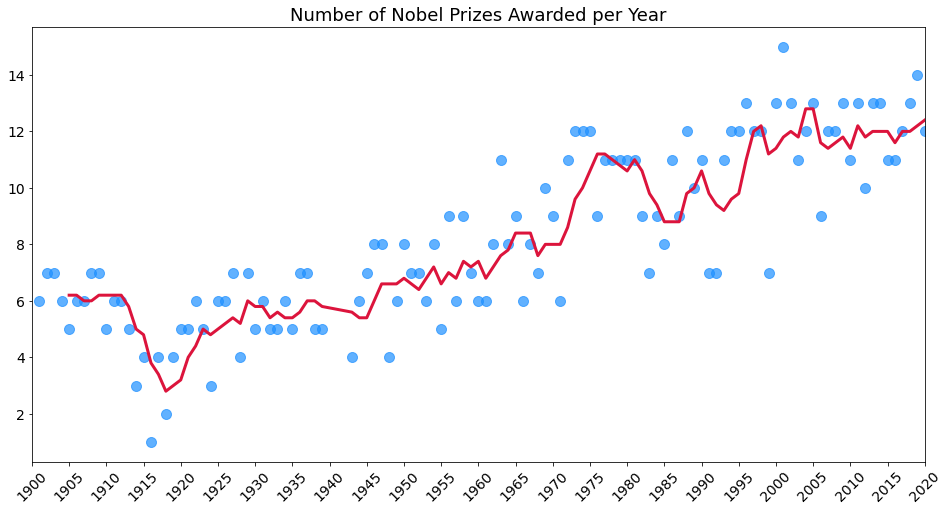

In [28]:
plt.figure(figsize=(16, 8))
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=time_range, fontsize=14, rotation=45)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)

ax.scatter(awards_per_year.index, awards_per_year.prize, c='dodgerblue', alpha=0.7, s=100)
ax.plot(awards_per_year.index, roll_df.prize, c='crimson', linewidth=3)
plt.show()

* The number of prizes awarded dropped during both world wars.
* The general trend is going up linearly.

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [29]:
# Average prize share on year by year
avg_prize_share = df_data.groupby('year').agg({'share_pct': pd.Series.mean})

In [30]:
# 5 year rolling of avg share
share_prize_roll_df = avg_prize_share.rolling(window=5).mean()

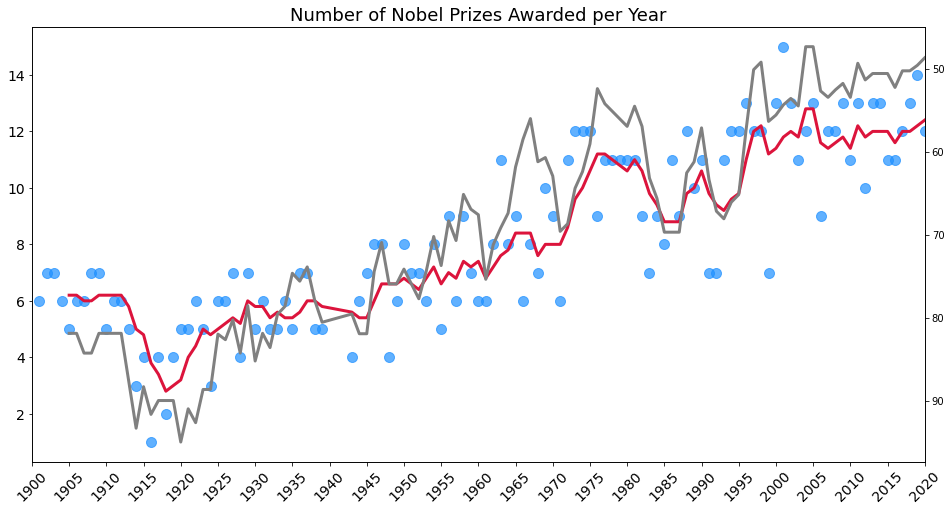

In [31]:
plt.figure(figsize=(16, 8))
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=time_range, fontsize=14, rotation=45)

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
ax2.invert_yaxis()

ax1.scatter(awards_per_year.index, awards_per_year.prize, c='dodgerblue', alpha=0.7, s=100)
ax1.plot(awards_per_year.index, roll_df.prize, c='crimson', linewidth=3)

ax2.plot(awards_per_year.index, share_prize_roll_df.share_pct, c='grey', linewidth=3)
plt.show()

There is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [32]:
top20_countries = df_data.groupby('birth_country_current').agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)[:20]
top20_countries

prize
birth_country_current          
United States of America    281
United Kingdom              105
Germany                      84
France                       57
Sweden                       29
Japan                        27
Poland                       27
Russia                       26
Canada                       20
Switzerland                  19
Italy                        19
Austria                      18
Netherlands                  18
Denmark                      12
China                        12
Norway                       12
Australia                    10
Belgium                       9
India                         9
South Africa                  9

In [33]:
bar = px.bar(top20_countries, 
             x='prize', 
             y=top20_countries.index, 
             orientation='h', 
             color='prize',
             title='Top 20 Countries by Number of Prizes')
bar.update_layout(xaxis_title='Number of Prizes', 
                  yaxis_title='Country', 
                  coloraxis_showscale=False, 
                  yaxis_autorange='reversed')
bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [34]:
prizes_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})

In [35]:
fig = px.choropleth(prizes_countries, locations='ISO',
                    color="prize", 
                    hover_name='birth_country_current',
                    color_continuous_scale=px.colors.sequential.matter,
                    title='Number of Prizes Won by Country')
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [36]:
prizes_cat_countries = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
prizes_cat_countries.sort_values('prize', ascending=False, inplace=True)

In [37]:
prizes_cat_countries

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [38]:
merged_df = pd.merge(prizes_cat_countries, top20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)
merged_df

birth_country_current    category  cat_prize  total_prize
108                     India     Physics          1            9
107                     India       Peace          1            9
88               South Africa       Peace          3            9
89               South Africa    Medicine          3            9
90               South Africa  Literature          2            9
..                        ...         ...        ...          ...
4    United States of America       Peace         19          281
3    United States of America   Economics         49          281
2    United States of America   Chemistry         55          281
1    United States of America     Physics         70          281
0    United States of America    Medicine         78          281

[109 rows x 4 columns]

In [39]:
bar = px.bar(merged_df, 
             x='cat_prize', 
             y='birth_country_current', 
             color='category', 
             orientation='h', 
             title='Top 20 Countries by Number of Prizes and Category')
bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='Country')
bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [40]:
prizes_year_country = df_data.groupby(['year','birth_country_current'], as_index=False).count()
prizes_year_country = prizes_year_country.sort_values('year')[['year', 'birth_country_current', 'prize']]
prizes_year_country

year     birth_country_current  prize
0    1901                    France      2
1    1901                   Germany      1
2    1901               Netherlands      1
3    1901                    Poland      1
4    1901               Switzerland      1
..    ...                       ...    ...
617  2019                   Germany      1
625  2020            United Kingdom      2
623  2020                    France      1
624  2020                   Germany      1
626  2020  United States of America      7

[627 rows x 3 columns]

In [41]:
# create a series that has the cumulative sum for the number of prizes won.
cumulative_prizes = prizes_year_country.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 

In [42]:
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [43]:
chart = px.line(cumulative_prizes, 
                x='year', 
                y='prize', 
                color='birth_country_current', 
                hover_name='birth_country_current',
                title='Cumulative Number of Prizes Won by Country Over Time')
chart.update_layout(yaxis_title='Number of Prizes Won')
chart.show()

What we see is that the United States really started to take off after the Second World War which decimated Europe. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too.

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [44]:
top20_organizations = df_data.groupby('organization_name').agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)[:20]
top20_organizations

prize
organization_name                                  
University of California                         40
Harvard University                               29
Stanford University                              23
Massachusetts Institute of Technology (MIT)      21
University of Chicago                            20
University of Cambridge                          18
California Institute of Technology (Caltech)     17
Columbia University                              17
Princeton University                             15
Rockefeller University                           13
Max-Planck-Institut                              13
University of Oxford                             12
MRC Laboratory of Molecular Biology              10
Yale University                                   9
Cornell University                                8
Bell Laboratories                                 8
London University                                 7
Sorbonne University                               7
Harvard Medical School                            7
University College London                         7

In [45]:
bar = px.bar(top20_organizations, 
             x='prize', 
             y=top20_organizations.index, 
             orientation='h', 
             color='prize',
             title='Top 20 Organizations by Number of Prizes')
bar.update_layout(xaxis_title='Number of Prizes', 
                  yaxis_title='Organization', 
                  coloraxis_showscale=False, 
                  yaxis_autorange='reversed')
bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [46]:
top20_cities = df_data.groupby('organization_city').agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)[:20]

In [47]:
bar = px.bar(top20_cities, 
             x='prize', 
             y=top20_cities.index, 
             orientation='h', 
             color='prize',
             title='Top 20 Organization Cities by Number of Prizes')
bar.update_layout(xaxis_title='Number of Prizes', 
                  yaxis_title='City', 
                  coloraxis_showscale=False, 
                  yaxis_autorange='reversed')
bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [48]:
top20_birth_cities = df_data.groupby('birth_city').agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)[:20]

In [49]:
bar = px.bar(top20_birth_cities, 
             x='prize', 
             y=top20_birth_cities.index, 
             orientation='h', 
             color='prize',
             title="Top 20 Laureate's Birth Cities by Number of Prizes",
             color_continuous_scale='Plasma')
bar.update_layout(xaxis_title='Number of Prizes', 
                  yaxis_title='City', 
                  coloraxis_showscale=False, 
                  yaxis_autorange='reversed')
bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [50]:
prizes_country_city_org = df_data.groupby(['organization_country','organization_city','organization_name'], as_index=False).agg({'prize': pd.Series.count})
prizes_country_city_org

organization_country     organization_city  \
0                   Argentina          Buenos Aires   
1                   Argentina          Buenos Aires   
2                   Australia              Canberra   
3                   Australia             Melbourne   
4                   Australia              Nedlands   
..                        ...                   ...   
286  United States of America    West Lafayette, IN   
287  United States of America        Wilmington, DE   
288  United States of America        Woods Hole, MA   
289  United States of America         Worcester, MA   
290  United States of America  Yorktown Heights, NY   

                                     organization_name  prize  
0                   Institute for Biochemical Research      1  
1    Instituto de Biologia y Medicina Experimental ...      1  
2                       Australian National University      1  
3    Walter and Eliza Hall Institute for Medical Re...      1  
4    NHMRC Helicobacter pylori Research Laboratory,...      1  
..                                                 ...    ...  
286                                  Purdue University      2  
287                                            Du Pont      1  
288                 Marine Biological Laboratory (MBL)      1  
289         University of Massachusetts Medical School      1  
290               IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [63]:
burst = px.sunburst(prizes_country_city_org, 
                  path=['organization_country', 'organization_city', 'organization_name'], 
                  values='prize', 
                  title='Where do Nobel Awarded Discoveries Take Place?')
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [52]:
df_data['winning_age'] = df_data.year - df_data.birth_date.dt.year
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name birth_date  \
0      Individual  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual               Sully Prudhomme 1839-03-16   
2      Individual        Emil Adolf von Behring 1854-03-15   
3      Individual                Frédéric Passy 1822-05-20   
4      Individual             Jean Henry Dunant 1828-05-08   
..            ...                           ...        ...   
957    Individual              Michael Houghton 1949-07-02   
958  Organization    World Food Programme (WFP)        NaT   
959    Individual                   Andrea Ghez 1965-06-16   
960    Individual               Reinhard Genzel 1952-03-24   
961    Individual                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      o

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? youngest is Malala Yousafzai and oldest is John Goodenough
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [53]:
# Youngest winner
df_data.sort_values('winning_age')[:1]

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK      50.00        17.00

In [54]:
# Oldest winner
df_data.sort_values('winning_age', ascending=False)[:1]

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU      33.33        97.00

In [55]:
# Average age of a winner
df_data.winning_age.mean()

59.94860813704497

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [56]:
# Quartiles
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

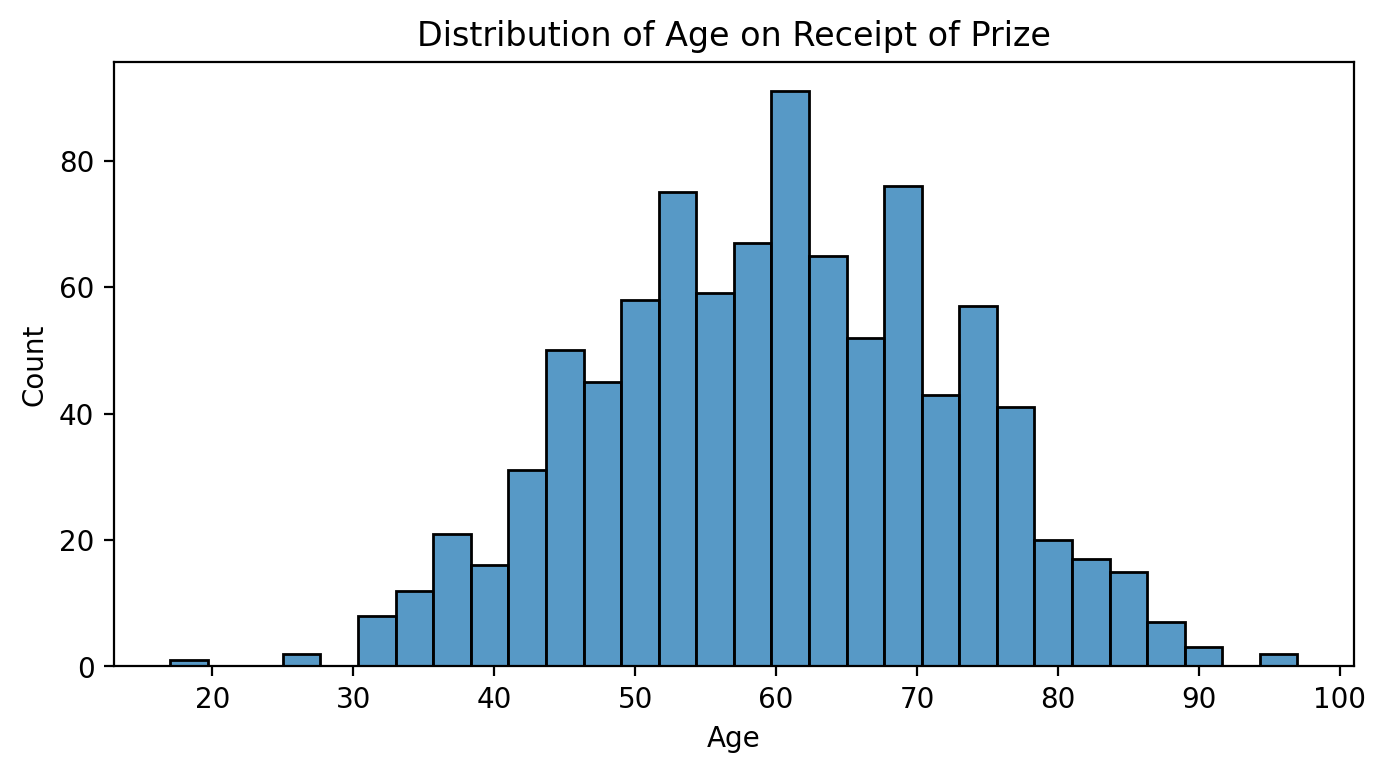

In [58]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

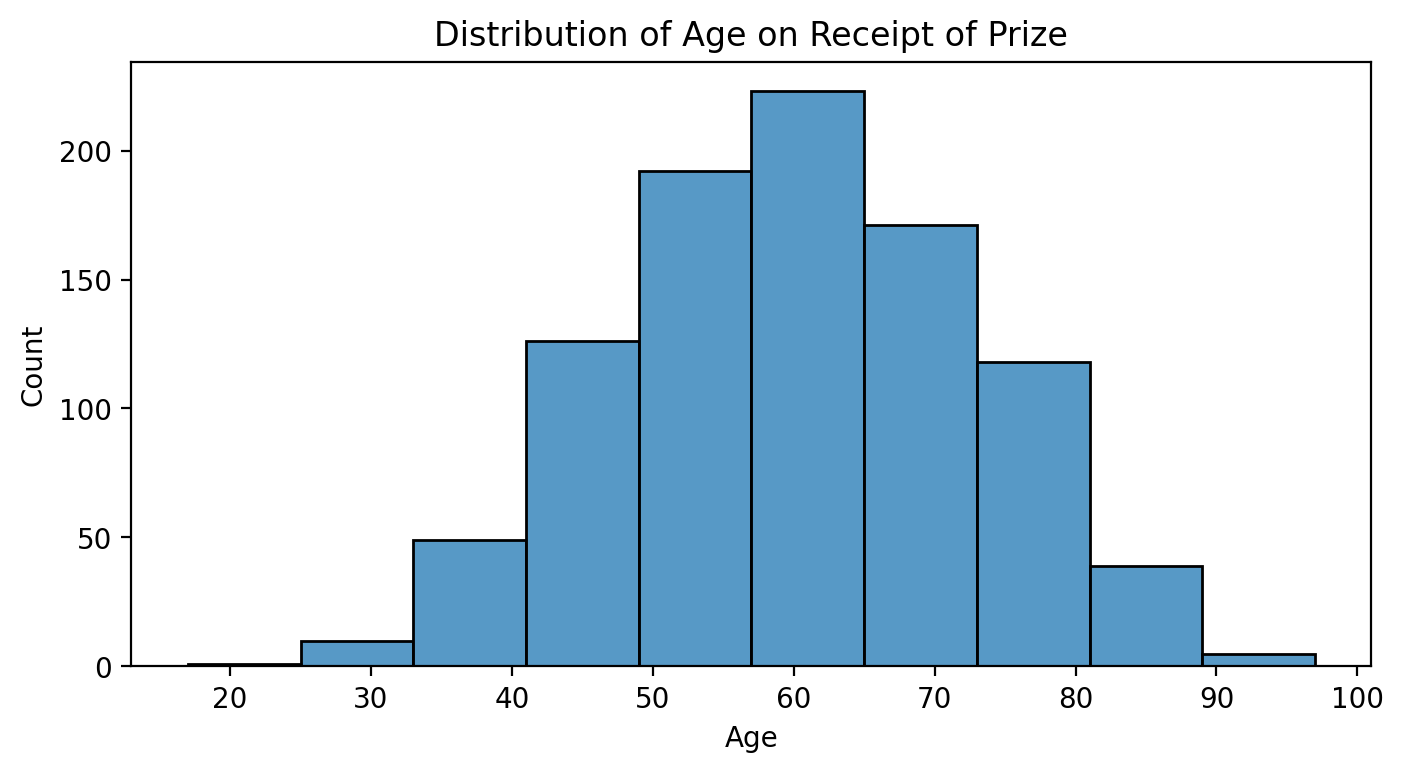

In [59]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=10)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

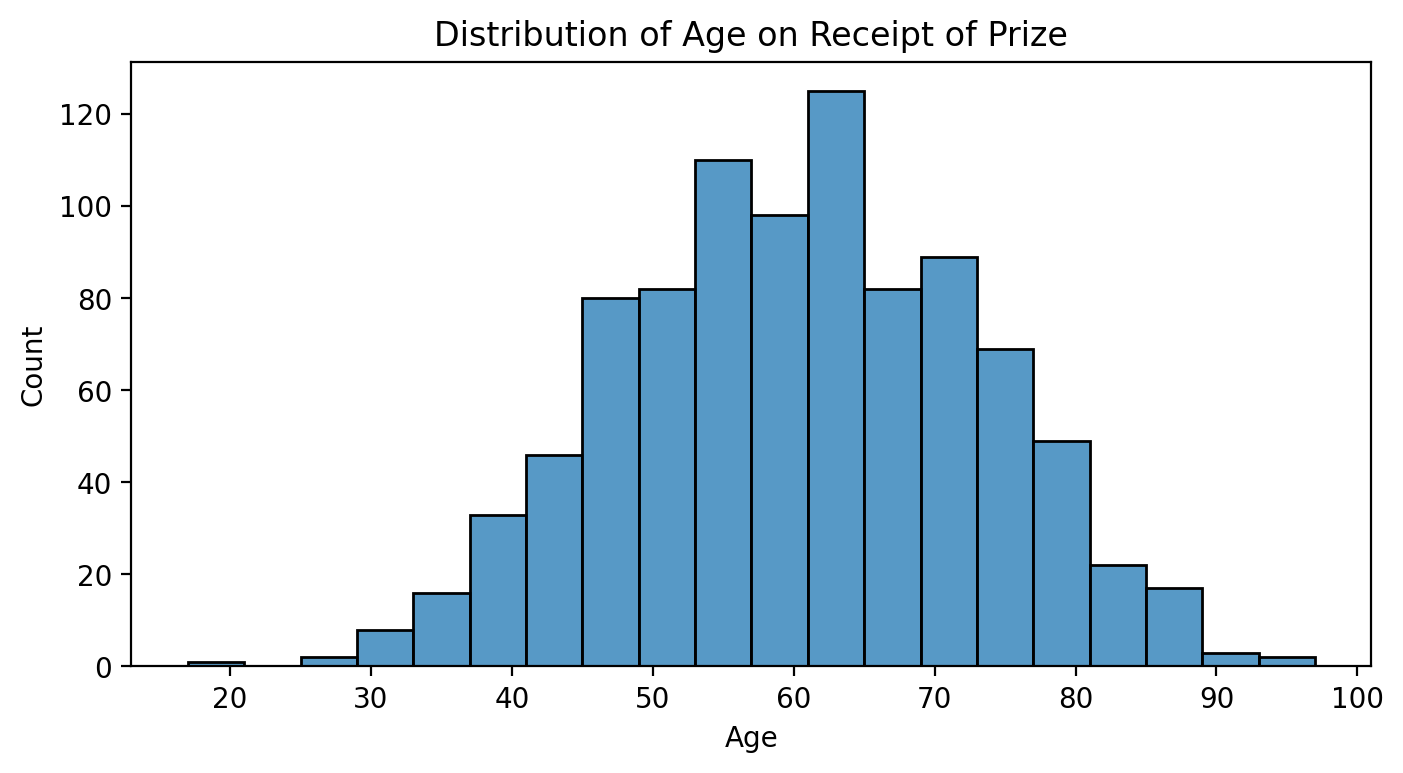

In [60]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

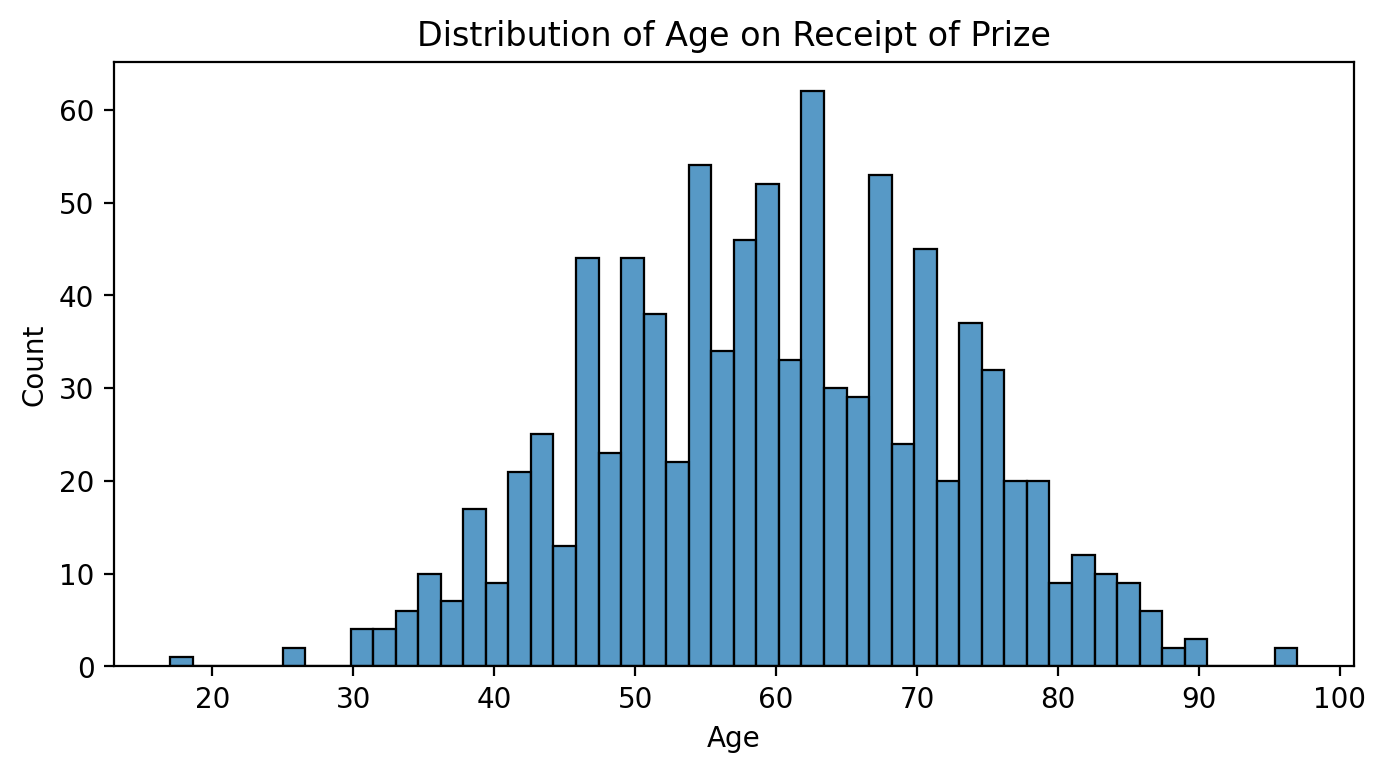

In [61]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=50)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


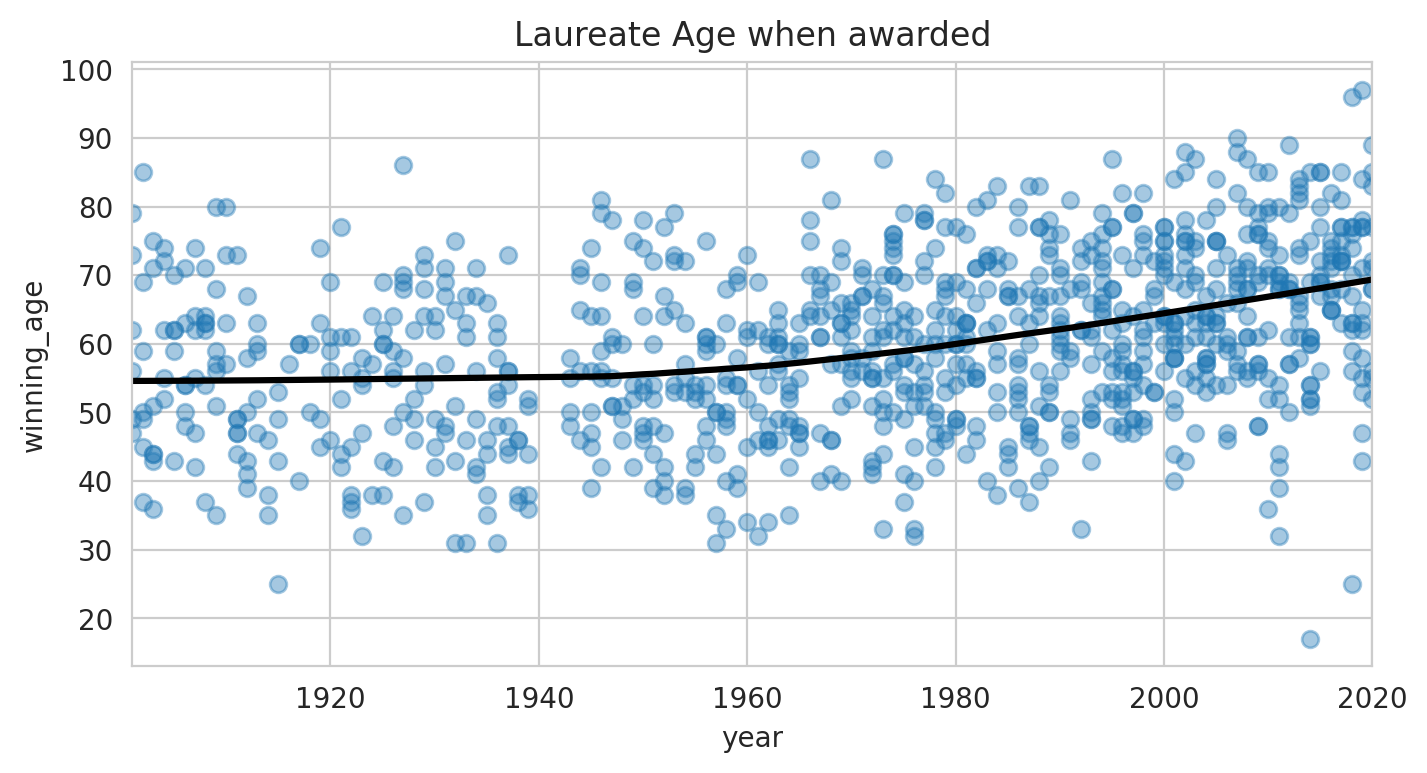

In [67]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.title('Laureate Age when awarded')
plt.show()

Using the lowess parameter allows us to plot a local linear regression. This means the best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

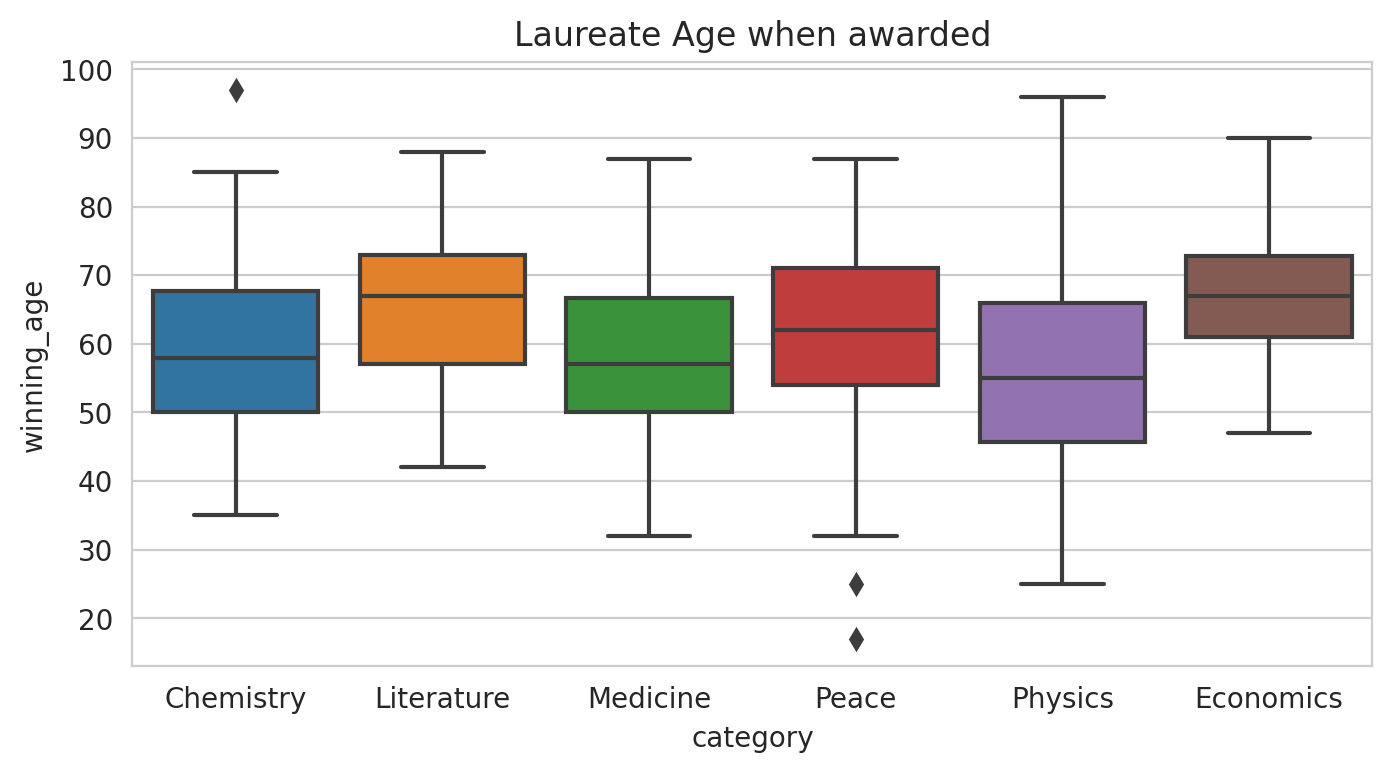

In [68]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')

plt.title('Laureate Age when awarded')
plt.show()

In [70]:
box = px.box(df_data, 
             x='category', 
             y='winning_age',  
             title="Laureate Age when awarded")
box.update_layout(xaxis_title='Category', 
                  yaxis_title="Laureate's Age")
box.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


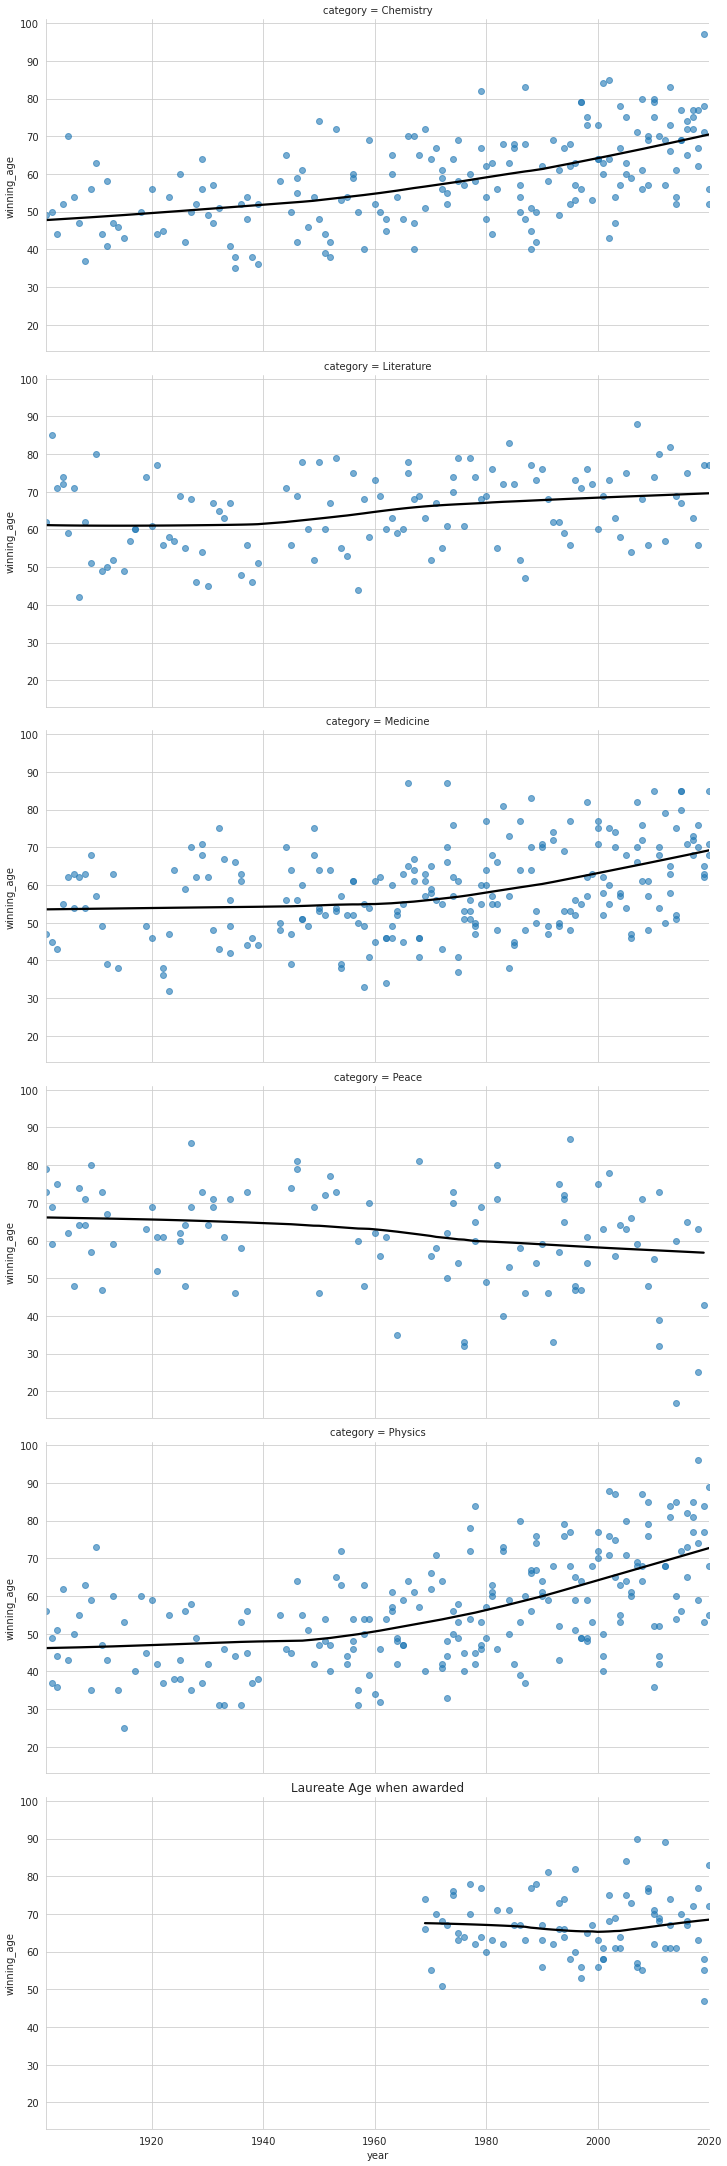

In [74]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
                x='year',
                y='winning_age',
                row='category', 
                lowess=True, 
                aspect=2, 
                scatter_kws = {'alpha': 0.6},
                line_kws = {'color': 'black'})

plt.title('Laureate Age when awarded')
plt.show()

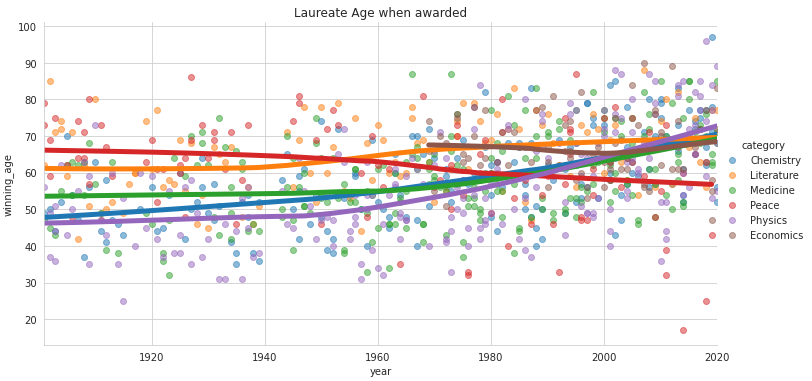

In [76]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
                x='year',
                y='winning_age',
                hue='category', 
                lowess=True, 
                aspect=2, 
                scatter_kws = {'alpha': 0.5},
                line_kws = {'linewidth': 5})

plt.title('Laureate Age when awarded')
plt.show()

We see that winners in physics, chemistry, and medicine have gotten older over time. The ageing trend is strongest for physics. The average age used to be below 50, but now it's over 70. Economics, the newest category, is much more stable in comparison. The peace prize shows the opposite trend where winners are getting younger! As such, our scatter plots showing the best fit lines over time and our box plot of the entire dataset can tell very different stories!